In [9]:
import numpy as np
import sys
import matplotlib.pyplot as plt

In [10]:
class GeneratorNN(object):
    
    def __init__(self, learning_rate=0.1):
        self.weights_0_1 = np.random.normal(0.0, 2 ** -0.5, (3, 3))
        self.weights_1_2 = np.random.normal(0.0, 1, (2, 3))
        self.weights_2_3 = np.random.normal(0.0, 1, (1, 2))
        self.sigmoid_mapper = np.vectorize(self.sigmoid)
        self.learning_rate = np.array([learning_rate])
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def predict(self, inputs):
        inputs_1 = np.dot(self.weights_0_1, inputs)
        outputs_1 = self.sigmoid_mapper(inputs_1)
        
        inputs_2 = np.dot(self.weights_1_2, outputs_1)
        outputs_2 = self.sigmoid_mapper(inputs_2)
        
        inputs_3 = np.dot(self.weights_2_3, outputs_2)
        outputs_3 = self.sigmoid_mapper(inputs_3)
        return outputs_3
    
    def train(self, inputs, expected_predict):     
        inputs_1 = np.dot(self.weights_0_1, inputs)
        outputs_1 = self.sigmoid_mapper(inputs_1)
        
        inputs_2 = np.dot(self.weights_1_2, outputs_1)
        outputs_2 = self.sigmoid_mapper(inputs_2)
        
        inputs_3 = np.dot(self.weights_2_3, outputs_2)
        outputs_3 = self.sigmoid_mapper(inputs_3)
        actual_predict = outputs_3[0]
        
        error_layer_3 = np.array([actual_predict - expected_predict])
        gradient_layer_3 = actual_predict * (1 - actual_predict)
        weights_delta_layer_3 = error_layer_3 * gradient_layer_3 
        self.weights_2_3 -= (np.dot(weights_delta_layer_3, outputs_2.reshape(1, len(outputs_2)))) * self.learning_rate
       
        error_layer_2 = weights_delta_layer_3 * self.weights_2_3
        gradient_layer_2 = outputs_2 * (1 - outputs_2)
        weights_delta_layer_2 = error_layer_2 * gradient_layer_2
        self.weights_1_2 -= np.dot(outputs_1.reshape(len(outputs_1), 1), weights_delta_layer_2).T  * self.learning_rate
        
        error_layer_1 = np.dot(weights_delta_layer_2, self.weights_1_2)
        gradient_layer_1 = outputs_1 * (1 - outputs_1)
        weights_delta_layer_1 = error_layer_1 * gradient_layer_1
        self.weights_0_1 -= np.dot(inputs.reshape(len(inputs), 1), weights_delta_layer_1).T  * self.learning_rate
        


In [11]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [50]:
train = [
    ([0.2, 0.14, 0.75], 0.1),
    ([0.1, 0.4, 0.80], 0.2),
    ([0.1, 0.4, 0.83], 0.3),
    ([0.2, 0.16, 0.60], 0.9),
    ([0.1, 0.12, 0.55], 0.2),
    ([0.2, 0.11, 0.30], 0.9),
    ([0.1, 0.16, 0.80], 0.8),
    ([0.1, 0.12, 0.37], 0.9),
    ([0.2, 0.15, 0.76], 0.1),
    ([0.1, 0.5, 0.80], 0.2),
    ([0.1, 0.4, 0.84], 0.9),
    ([0.2, 0.12, 0.60], 0.9),
    ([0.1, 0.13, 0.45], 0.2),
    ([0.1, 0.12, 0.80], 0.9),
    ([0.1, 0.13, 0.80], 0.1),
    ([0.1, 0.11, 0.31], 0.9),
    ([0.2, 0.12, 0.73], 0.1),
    ([0.1, 0.5, 0.40], 0.2),
    ([0.1, 0.2, 0.73], 0.1),
    ([0.2, 0.16, 0.62], 0.9),
    ([0.1, 0.11, 0.55], 0.2),
    ([0.1, 0.11, 0.80], 0.9),
    ([0.1, 0.16, 0.80], 0.8),
    ([0.1, 0.12, 0.37], 0.9),
    ([0.2, 0.14, 0.75], 0.1),
    ([0.1, 0.4, 0.80], 0.2),
    ([0.1, 0.4, 0.83], 0.3),
    ([0.2, 0.16, 0.60], 0.9),
    ([0.1, 0.12, 0.55], 0.2),
    ([0.1, 0.11, 0.80], 0.8),
    ([0.1, 0.16, 0.80], 0.1),
    ([0.1, 0.12, 0.37], 0.9),
    ([0.2, 0.11, 0.85], 0.2),
    ([0.1, 0.4, 0.80], 0.2),
    ([0.1, 0.4, 0.83], 0.3),
    ([0.2, 0.12, 0.50], 0.1),
    ([0.1, 0.12, 0.55], 0.2),
    ([0.1, 0.11, 0.80], 0.9),
    ([0.1, 0.18, 0.81], 0.1),
    ([0.1, 0.12, 0.38], 0.9),
]

In [51]:
#epochs = 5000
#learning_rate = 0.05
epochs = 6000
learning_rate = 0.08

network = GeneratorNN(learning_rate=learning_rate)
points = []
for e in range(epochs):
    inputs_ = []
    correct_predictions = []

    for input_stat, correct_predict in train:
        network.train(np.array(input_stat), correct_predict)
        inputs_.append(np.array(input_stat))
        correct_predictions.append(np.array(correct_predict))
    train_loss = MSE(network.predict(np.array(inputs_).T), np.array(correct_predictions))    
    if e % 20 == 0:
        points.append((train_loss, e))
    
    sys.stdout.write("\rProgress: {}, Training loss: {}".format(str(100 * e/float(epochs))[:4], str(train_loss)[:5]))

Progress: 99.9, Training loss: 0.102

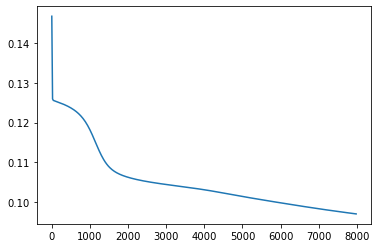

In [42]:
x = [x[1] for x in points]
y = [x[0] for x in points]

plt.plot(x,y)
plt.show()

In [38]:
for input_stat, correct_predict in train:
    print("For input: {} the prediction is: {}, expected: {}".format(
        str(input_stat), 
        str(network.predict(np.array(input_stat)) > .5),
        str(correct_predict >= 0.6)))
        

For input: [0.208, 0.14, 0.75] the prediction is: [False], expected: False
For input: [0.119, 0.4, 0.8] the prediction is: [False], expected: False
For input: [0.12, 0.4, 0.83] the prediction is: [False], expected: False
For input: [0.208, 0.16, 0.6] the prediction is: [False], expected: True
For input: [0.115, 0.12, 0.55] the prediction is: [ True], expected: False
For input: [0.21, 0.11, 0.3] the prediction is: [ True], expected: True
For input: [0.119, 0.16, 0.8] the prediction is: [False], expected: True
For input: [0.109, 0.12, 0.37] the prediction is: [ True], expected: True
For input: [0.209, 0.15, 0.76] the prediction is: [False], expected: False
For input: [0.12, 0.5, 0.8] the prediction is: [False], expected: False
For input: [0.12, 0.4, 0.84] the prediction is: [False], expected: True
For input: [0.211, 0.12, 0.6] the prediction is: [False], expected: True
For input: [0.116, 0.13, 0.45] the prediction is: [ True], expected: False
For input: [0.111, 0.12, 0.8] the prediction 

In [39]:
for input_stat, correct_predict in train:
    print("For input: {} the prediction is: {}, expected: {}".format(
        str(input_stat), 
        str(network.predict(np.array(input_stat))),
        str(correct_predict >= 0.6)))

For input: [0.208, 0.14, 0.75] the prediction is: [0.41197092], expected: False
For input: [0.119, 0.4, 0.8] the prediction is: [0.34608948], expected: False
For input: [0.12, 0.4, 0.83] the prediction is: [0.34368156], expected: False
For input: [0.208, 0.16, 0.6] the prediction is: [0.47116688], expected: True
For input: [0.115, 0.12, 0.55] the prediction is: [0.51807753], expected: False
For input: [0.21, 0.11, 0.3] the prediction is: [0.84579992], expected: True
For input: [0.119, 0.16, 0.8] the prediction is: [0.38595297], expected: True
For input: [0.109, 0.12, 0.37] the prediction is: [0.70978355], expected: True
For input: [0.209, 0.15, 0.76] the prediction is: [0.4052617], expected: False
For input: [0.12, 0.5, 0.8] the prediction is: [0.33717273], expected: False
For input: [0.12, 0.4, 0.84] the prediction is: [0.3429391], expected: True
For input: [0.211, 0.12, 0.6] the prediction is: [0.49870954], expected: True
For input: [0.116, 0.13, 0.45] the prediction is: [0.60243352]

In [40]:
network.weights_0_1

array([[-0.38223942,  2.45009354,  3.07662993],
       [-0.71021856, -0.14872659,  1.0016193 ],
       [ 1.07708018, -3.21214365, -3.04795862]])

In [13]:
network.weights_1_2

array([[-1.32214211,  1.4287101 ,  0.32520234],
       [-0.01124048,  0.8681332 , -0.27524922]])